# EPSM Machine Learning Workshop

Contacts:
* Jake Kendrick: jake.kendrick@research.uwa.edu.au
* Brani Rusanov: branimir.rusanov@research.uwa.edu.au

Welcome to the first part of the EPSM Workshop. Today, we'll be taking you through a worked example of applying machine learning techniques for predictive modelling on a tabular dataset comprised of clinical variables. The structure of this session will proceed as follows: 
* Basics of Python
* Dataset Exploration
* Model Training and Evaluation

In this first session, we will not be assuming much prior knowledge when it comes to utilising Python for training and testing Machine Learning (ML) models, so this will largely be a guided session where we keep things relatively simple. If you are already above the beginner level when it comes to ML model development, don't worry, as we progress to the later sessions we will be covering more advanced concepts. The goal is that hopefully everyone in the room, regardless of current knowledge or expertise levels, will get something out of this day. 

## Python Basics

Imports: 3rd party libraries can be downloaded and utilized. These packages include pre-defined functions we can call on which are useful for our particular project, so that we need not re-invent the wheel.

In [83]:
import pandas as pd #tabular data manipulation package
import numpy as np #array and number manipulation package
import sklearn #comprehensive machine learning framework package

In [84]:
#Basic python operations (add etc)
4 + 4

8

In Python, you can define custom functions to perform task specific operations. The proper way to define a basic subtraction function is as follows:

In [85]:
def subtraction(x,y):
  return x-y

In [86]:
result = subtraction(5,2)
print(result)

3


In Python, there are a number of different data types that specify what operations we can perform on different variables. Three of the most common data types that you'll encounter in python are strings, integers, and floats. 

In [87]:
# String example
string = 'This is a string'

# Integer example
integer_value = 2002

# Float example 
float_value = 6.75

We can also store data in various different data containers that we can perform useful operations on. One of the most common examples of a data container is called a list, instantiated with square brackets [ ] 

In [88]:
python_list = [1,2,3]
print(python_list)

[1, 2, 3]


We can then use this list and convert it into a number of other useful data containers using the packages that we imported above. 

* Numpy arrays allow us to perform a huge number of mathematical array operations on our data. Almost every data science project will make use of numpy in some way. 

* Pandas dataframes make analysis of tabular data very easy and intuitive using their library of functions. This will be the primary data container we will be using as we proceed with the machine learning analysis.



In [89]:
#Convert our list into numpy array
numpy_array = np.array(python_list)

#Convert our list into pandas dataframe
pandas_dataframe = pd.DataFrame(python_list)

In [90]:
print(f'This is a Numpy array: \n{numpy_array}')
print(f'This is a Pandas DataFrame: \n{pandas_dataframe}')

This is a Numpy array: 
[1 2 3]
This is a Pandas DataFrame: 
   0
0  1
1  2
2  3


It is generally important to know the format in which you are storing your data, since this will effect how various operations performed on them are conducted.

For example, lists cannot perform direct mathematical operations, whereas numpy arrays and pandas dataframes can. 

In [91]:
print(f"Pandas dataframe elementwise addition: \n{pandas_dataframe+3}")

print(f"Numpy array elementwise addition: \n{numpy_array+3}")

Pandas dataframe elementwise addition: 
   0
0  4
1  5
2  6
Numpy array elementwise addition: 
[4 5 6]


In [92]:
print(f"List elementwise addition: \n{python_list+3}")

TypeError: ignored

## Data Exploration

In this tutorial session, we will be analysing a tabular dataset consisting of a variety of different clinical variables. The goal will be to use these clinical variables to build a model that can diagnose the patient with heart disease. Let's download our dataset and have a look at it. 

In [93]:
#We can download GitHub repositories directly to our drive using the following command
!git clone https://github.com/JakeKendrick1/Machine_Learning_EPSM.git

fatal: destination path 'Machine_Learning_EPSM' already exists and is not an empty directory.


In [94]:
data_dir = '/content/Machine_Learning_EPSM/heart_data_EPSM.csv' #get filepath
data_df = pd.read_csv(data_dir) #open csv using pandas
data_df #visualize dataframe

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1.0
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1.0
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1.0
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1.0
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,1,0,3,0.0
299,45,1,3,110,264.0,0,1,132.0,0,1.2,1,0,3,0.0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,1,2,3,0.0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,1,1,3,0.0


So we have imported the data into a pandas dataframe. As you can see, this is essentially a 2D spreadsheet-like structure that is very useful for storing tabular data. It is capable of storing many different types of data, including floats, integers, and strings. 

**About the Dataset**

1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trtbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalachh - maximum heart rate achieved

9. exng - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slp - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. caa - number of major vessels (0-3) colored by flouroscopy

13. thall - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. output - coronary artery diameter narrowing measured on angiogram - This is what we are trying to predict (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing). 


So, we have 13 columns corresponding to features that we can use to build our predictive model, and one column pertaining to what we are trying to predict. Our target variable is essentially a risk classification for that particular patient - a value of 1 corresponds to a patient at high risk of heart attack, and a value of 0 corresponds to a patient at lower risk of heart attack. 

If you want to know more about this dataset, you can see the associated paper [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/).

In [95]:
#Quick data overview.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      300 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  302 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    301 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [96]:
#We have nans
print(data_df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        3
fbs         0
restecg     0
thalachh    1
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      2
dtype: int64


## Data Cleaning

When analysing real world datasets, the data that you have may be incomplete. However, most trainable machine learning models require numerical data for each instance. Before undertaking any training, we must identify any missing values and replace them in a process called **imputing**. Several techniques exist for handling missing data:
* Removing entire instances where data is missing
* Univariate imputation: use single feature dimension to estimate missing value. Can use mean, median, mode, constant
* multivariate imputation: use all data to estimate missing values. Missing values are estimated using ancillary model which uses all other features to predict missing values

The key thing to remember, as with almost everything in machine learning, we don't know in advance which of these methods will produce the best results. 

In [97]:
#Let's have a look and see if we are missing any target variables in our dataset.
idx_na = np.where(data_df['output'].isna())[0]
for i in idx_na:
  print(f'Data instance {i} is missing a target variable.')

Data instance 11 is missing a target variable.
Data instance 229 is missing a target variable.


What do we do with these cases where we are missing the outcome variable? Can we simply replace it with the mean or median? In this instance, imputing is not a good strategy. Since we are attempting to predict the outcome variable, and if by chance we impute the wrong value this could have a detrimental effect on our model performance. It is safer in this case, since there is only two instances for which we are missing information, to remove these patients from the dataset.

In [98]:
data_df = data_df.drop(axis=0, index=idx_na)
data_df = data_df.reset_index(drop=True)

In [99]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trtbps    301 non-null    int64  
 4   chol      298 non-null    float64
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalachh  300 non-null    float64
 8   exng      301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slp       301 non-null    int64  
 11  caa       301 non-null    int64  
 12  thall     301 non-null    int64  
 13  output    301 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 33.0 KB


As we can see, two patients have been removed from out data, but we no longer have missing values for out output

In [100]:
len(data_df)

301

Now let's separate our outcomes and predictive features in order to apply imputation methods on missing data:

In [101]:
#separate output (y) from training data (x).
feats = data_df.drop(axis=1,labels=['output'])
diagnosis = data_df['output']

In [102]:
#checking where nan occurs for 'chol' feature
idx_na_chol = np.where(feats['chol'].isna())[0]
print(idx_na_chol)

[12 94 95]


In [104]:
print('sanity check instance 11: '+str(feats['chol'][11]))
print('sanity check instance 12: '+str(feats['chol'][12]))

sanity check instance 11: 266.0
sanity check instance 12: nan


In [105]:
#Univariate data imputer: replace missing values with column mean
from sklearn.impute import SimpleImputer
imputer_univariate = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imputed_uni = imputer_univariate.fit_transform(feats)

In [106]:
type(df_imputed_uni)

numpy.ndarray

Notice that this imputer function does not return a pandas dataframe, but instead returns a numpy array. It is important to keep track of the format in which your data is being stored. You can check this using the 'type' function. We'll need to convert this back to a pandas dataframe later.

In [107]:
#checking to see if imputer replaced nan. 
print('sanity check instance 11: '+str(df_imputed_uni[11,4]))
print('sanity check: imputed instance: '+str(df_imputed_uni[12,4]))

sanity check instance 11: 266.0
sanity check: imputed instance: 245.6476510067114


**Task 1**

1. Replace the missing data using the univariate imputer, except this time using the *median* instead of the mean. Don't forget to assign it to a new variable!
2. Print out the imputed value using the examples above as a guide.
* Hint: Check the SimpleImputer function [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) if you're having trouble.

In [108]:
#Median univariate imputer
imputer_univariate = SimpleImputer(missing_values=np.nan, strategy='median')
df_imputed_uni_med = imputer_univariate.fit_transform(feats)
print('sanity check instance 11: '+str(df_imputed_uni_med[11,4]))
print('sanity check: imputed instance: '+str(df_imputed_uni_med[12,4]))


sanity check instance 11: 266.0
sanity check: imputed instance: 240.0


There are also other more complicated methods for imputing missing data, such as multivariate imputation. Here, missing values are predicted based on their relationship to the other variables.

In [109]:
#Multivariate data imputer: replace missing vlaues with estimated values
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
imputer_multivariate = IterativeImputer(missing_values=np.nan, initial_strategy='mean')
df_imputed_multi = imputer_multivariate.fit_transform(feats)

In [110]:
#checking to see if imputer replaced nan
print('sanity check instance 11: '+str(df_imputed_multi[11,4]))
print('sanity check imputed instance: '+str(df_imputed_multi[12,4]))

sanity check instance 11: 266.0
sanity check imputed instance: 249.20308373869722


In summary, there are a myriad of different ways in which you can deal with missing data, each resulting in a different imputed data value. 

Next, we convert our imputed variables, which are stored in a numpy array, back into a pandas dataframe:

In [111]:
#Getting cleaned features back into dataframe for feature selection
feats_cleaned = pd.DataFrame(df_imputed_multi,columns=list(feats))
feats_cleaned

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
297,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
298,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
299,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


In [112]:
print(feats_cleaned.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64


After our quick data cleaning process, we now have no more missing values in our dataset. We've removed the rows where there is no target variable, and have replaced missing values in the feature columns using a multivariate imputing method.

Using Pandas, it is trivially easy to calculate summary statistics on each of the columns in our tabular dataset. 

In [113]:
#Summarise feature statistics:
feats_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,301.0,54.355482,9.087897,29.0,47.0,55.0,61.0,77.0
sex,301.0,0.684385,0.465534,0.0,0.0,1.0,1.0,1.0
cp,301.0,0.956811,1.030273,0.0,0.0,1.0,2.0,3.0
trtbps,301.0,131.651163,17.592079,94.0,120.0,130.0,140.0,200.0
chol,301.0,245.679903,51.090711,126.0,211.0,241.0,274.0,564.0
fbs,301.0,0.149502,0.357176,0.0,0.0,0.0,0.0,1.0
restecg,301.0,0.524917,0.526191,0.0,0.0,1.0,1.0,2.0
thalachh,301.0,149.754673,22.951306,71.0,134.0,153.0,166.0,202.0
exng,301.0,0.325581,0.469372,0.0,0.0,0.0,1.0,1.0
oldpeak,301.0,1.039867,1.163102,0.0,0.0,0.8,1.6,6.2


**Types of Features**

* As we can see from our tabulated summary statistics, some of our features are *continuous variables*, and some are *categorical variables*. 
* If our categorical variables are not *ordinal* (ordered by severity), our model will interpret higher values as higher real-world values. 
* The 'sex' feature is a perfect example of this, where a higher value (1 = Male) does not correspond to a higher real-world value. 
* The model will interpret this as the 1 value having greater significance than the 0 value, even though this is untrue.

We can counter this by [one-hot encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) all of our categorical variables. This process creates a new binary feature for each possible value of the categorical variable, and assigns a 1 to the new feature that corresponds with the old category for each data point. 'Sex' will therefore be split into two new features, one for males and one for females.
* One-hot-encoding could also be used if the Sex column contained text, i.e. 'Male' for males and 'Female' for females.

In [114]:
#Lists of categorical and continuous variables
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

In [115]:
#One-hot encoding the categorical variables using in built pandas function
feats_cleaned = pd.get_dummies(feats_cleaned, columns = cat_cols, drop_first = False)

In [116]:
feats_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,301.0,54.355482,9.087897,29.0,47.0,55.0,61.0,77.0
trtbps,301.0,131.651163,17.592079,94.0,120.0,130.0,140.0,200.0
chol,301.0,245.679903,51.090711,126.0,211.0,241.0,274.0,564.0
thalachh,301.0,149.754673,22.951306,71.0,134.0,153.0,166.0,202.0
oldpeak,301.0,1.039867,1.163102,0.0,0.0,0.8,1.6,6.2
sex_0.0,301.0,0.315615,0.465534,0.0,0.0,0.0,1.0,1.0
sex_1.0,301.0,0.684385,0.465534,0.0,0.0,1.0,1.0,1.0
exng_0.0,301.0,0.674419,0.469372,0.0,0.0,1.0,1.0,1.0
exng_1.0,301.0,0.325581,0.469372,0.0,0.0,0.0,1.0,1.0
caa_0.0,301.0,0.574751,0.495204,0.0,0.0,1.0,1.0,1.0


## Feature Selection

It is very common when training ML models to undergo a process of feature selection. There are a few reasons we might want to not use all the features in our dataset:

1. Redundancy: Features that are highly correlated with each other are unlikely to provide useful additional information to the model
2. Non-descriptive: Some features won't have a good relationship with the target variable.
3. Dimensionality Reduction: The more features you have in your predictive model, the higher the chance of overfitting. 


Lets first visualise the correlation between features using a handy function to display the diagonal correlation matrix:

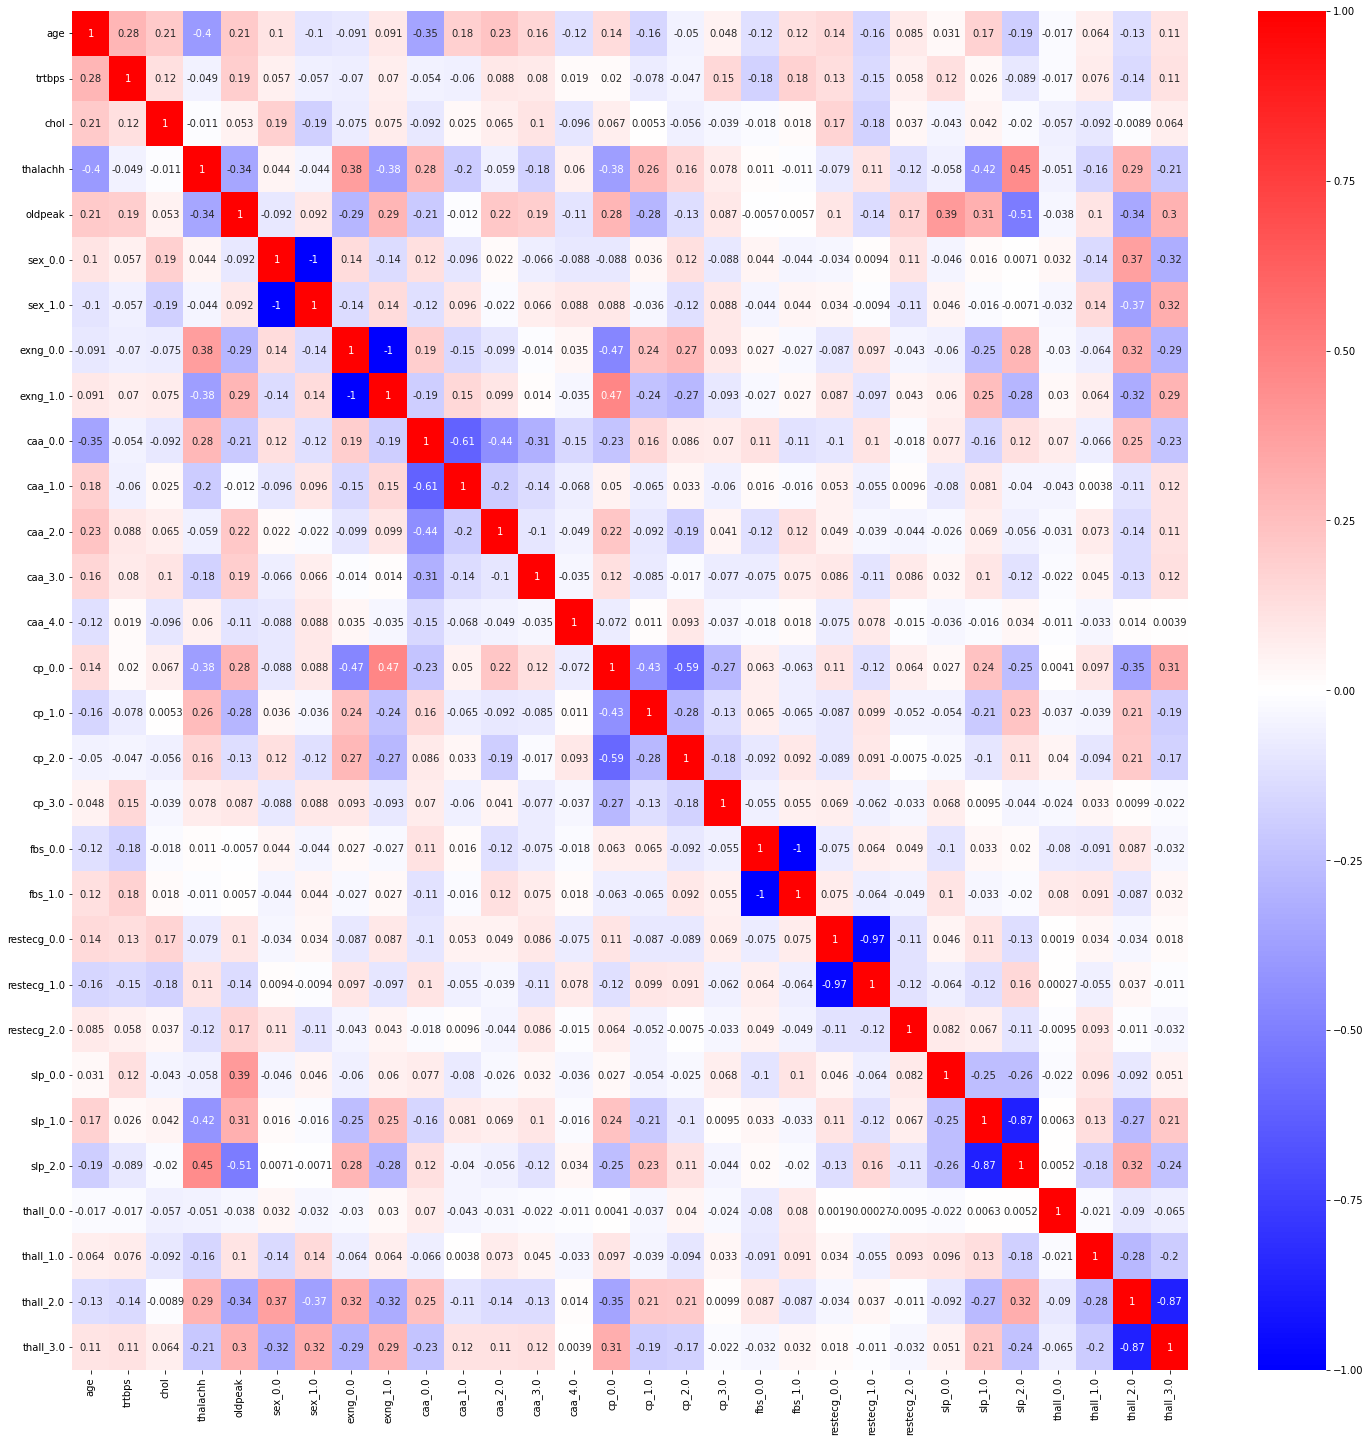

In [117]:
#Calculating the correlation between all of our features
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = feats_cleaned.corr() #computes Pearson Correlation coefficients
plt.figure(figsize=(25,25))
sn.heatmap(corrMatrix, annot=True, cmap = 'bwr')

We note that most features are uncorrelated (~0), with most correlated features being one-hot-encoded variables of the original feature, suggesting there are minimal redundant features in our data

**Feature Selection: ANOVA-F Value**

There are many ways in which features can be selected. One method is to compare the mean and variance of each of our features for the two possible target variable outcomes. If a feature has a similar mean and variance for both target outcomes, then it is unlikely to discriminate between the two very well. We can rank features based on this criteria using the ANOVA f-value, and choose the top 'k' features we want to use. 

In [118]:
#Feature selection based on ANOVA f-value

NUM_FEATURES_CHOSEN = 5 #Modify the top number of features to use.

from sklearn.feature_selection import GenericUnivariateSelect, f_classif
transformer = GenericUnivariateSelect(f_classif, mode='k_best', param = NUM_FEATURES_CHOSEN)
feats_cleaned_reduced = transformer.fit(feats_cleaned, diagnosis)

In [119]:
#Displaying Selected Features
features_selected = feats_cleaned_reduced.get_support(indices = True)
feat_names = []
for feature_index in features_selected:
    feat_names.append(list(feats_cleaned)[feature_index])

print(feat_names)

['exng_1.0', 'caa_0.0', 'cp_0.0', 'thall_2.0', 'thall_3.0']


Interestingly, in the original article [1] that introduced this dataset, 3/5 of the most predictive features were found to agree with the above (exang, caa, thall).

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/

In [120]:
#Transforming our data into just the selected features
feats_cleaned_reduced = transformer.fit_transform(feats_cleaned, diagnosis)

This is one of the ways in which the feature space can be reduced. As always, experimentation with many different types is advisable. A general rule of thumb is that you should have at least **10 training samples for every feature in your predictive model** to minimise the chances of overfitting.

In [121]:
#Checking if data is balanced:
diagnosis.value_counts()

1.0    164
0.0    137
Name: output, dtype: int64

Checking the class ratios of our target variable is important, as it can affect drastically how we interpret the results of the model. The Accuracy metric can be misleading for a dataset with large class imbalance.

Splitting our data in preparation for training. We use a 80:20 training-to-testing set split

In [122]:
#Split our data into training and testing sets

TEST_SIZE = 0.20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feats_cleaned_reduced, diagnosis, test_size = TEST_SIZE, random_state=10) # use stratify if inbalanced data
print('train features: '+str(X_train.shape))
print('train targets: '+str(y_train.shape))
print('test features: '+str(X_test.shape))
print('test targets: '+str(y_test.shape))
y_train = list(y_train)
y_test = list(y_test)

train features: (240, 5)
train targets: (240,)
test features: (61, 5)
test targets: (61,)


## Data Normalisation

Normalising feature values before training ML models is important, as it reduces model bias towards large absolute features and generally improves model stability. First, we will normalise our data to be between a range of 0 and 1 using MinMaxScaler. We do this using only the training data, and then use the statistics calculated for the training data on the testing set. We assume that the data distribution of the training set approximates that which it will be tested and used on in the real world, hence we use training statistics on our testing set. 

In [123]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_train_scaled_minmax = scaler_minmax.transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test) #using statistics of training data to scale testing data


**Task 2 (5 Minutes)**

1. Import the sklearn StandardScaler (hint: see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)!)
2. Standardise the training and testing data using this StandardScaler, with the help of the example above. The variable names have been provided to you below.

In [124]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
scaler_std.fit(X_train)
X_test_scaled = scaler_std.transform(X_train)
X_train_scaled = scaler_std.transform(X_test)

# print(np.size(X_train_scaled))
# print(np.size(X_test_scaled))

# plt.hist(X_train_scaled[:,0])


In [125]:
X_train_scaled

array([[ 1.41421356, -1.23544154,  1.07803625, -1.09628229,  1.27959472],
       [-0.70710678,  0.80942721,  1.07803625,  0.91217381, -0.78149744],
       [-0.70710678,  0.80942721, -0.92761259, -1.09628229,  1.27959472],
       [-0.70710678, -1.23544154, -0.92761259,  0.91217381, -0.78149744],
       [-0.70710678,  0.80942721,  1.07803625, -1.09628229,  1.27959472],
       [-0.70710678,  0.80942721, -0.92761259,  0.91217381, -0.78149744],
       [-0.70710678, -1.23544154, -0.92761259,  0.91217381, -0.78149744],
       [ 1.41421356, -1.23544154,  1.07803625, -1.09628229,  1.27959472],
       [-0.70710678,  0.80942721, -0.92761259,  0.91217381, -0.78149744],
       [-0.70710678, -1.23544154,  1.07803625,  0.91217381, -0.78149744],
       [-0.70710678,  0.80942721, -0.92761259, -1.09628229,  1.27959472],
       [ 1.41421356, -1.23544154,  1.07803625, -1.09628229,  1.27959472],
       [ 1.41421356,  0.80942721,  1.07803625,  0.91217381, -0.78149744],
       [-0.70710678, -1.23544154, -0.9

## Model Training and Evaluation

Having created a standardised set of features with associated outputs, we are now ready to begin training some ML models. We will implement a few different types of models, namely:

* Logistic regression
* Support vector machine
* Decision Tree
* Gradient boosting Classifier

We will then evaluate them using some standard classification metrics.

Below we have implemented some convenient functions that we can re-use as we are trying out different models in this process. They will also help you in your final task!

In [126]:
#Importing models and testing metrics
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.linear_model import LogisticRegression


#Function to rapidly train and evaluate trained models.
def train_model(model, train_x, train_y, test_x, test_y):
  model.fit(train_x, train_y) #performs training
  model_pred_training = model.predict(train_x) #model prediction on training data
  model_pred_testing = model.predict(test_x) #model prediction on testing data
  model_pred_testing_proba = model.predict_proba(test_x)[:, 1] #extracting probabilities for each testing instance
  model_acc_train = accuracy_score(model_pred_training, train_y) #computing accuracy for training data
  model_acc_test = accuracy_score(model_pred_testing, test_y) #computing accuracy for testing data
  model_auc = roc_auc_score(test_y, model_pred_testing_proba) #computing AUC for testing data
  return model_acc_train, model_acc_test, model_auc, model_pred_testing_proba, model_pred_testing

def roc_auc_curve (predicted_probabilities, y_test, title = str):
  
  '''
  Function will plot the receiver operater charactistic curve for a given
  set of model predictions.

  Inputs:
      predicted_probabilities (array): Model predicted probabilities
      y_test (array): Ground truth classifications.
      title (str): Title of the plot
  '''

  fpr, tpr, _ = roc_curve(y_test,  predicted_probabilities)
  plt.figure()
  lw = 2
  plt.step(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % auc,
  )
  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([-0.01, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()

**Logistic Regression**



In [129]:
model = LogisticRegression()
acc_train, acc_test, auc, prediction_proba, predictions = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
print(f'Training Accuracy: {acc_train:.3f}, Testing Accuracy: {acc_test:.3f}')
print(f'Testing AUC Value: {auc:.3f}')

Training Accuracy: 0.846, Testing Accuracy: 0.869
Testing AUC Value: 0.909


We can also display a confusion matrix to assess for which classes the model makes incorrect predictions. In this example, the most clinically significant case is the false negative case, where the model predicts a low risk when in fact the patient of high risk (bottom left quadrant)

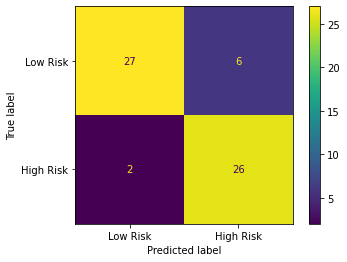

In [130]:
#Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Low Risk', 'High Risk'])
disp.plot()
plt.grid(False)
plt.show()

**ROC Curves**

The Receiver Operating Characteristic (ROC) curve is a very common and robust metric that tests the discriminatory power of our model at various thresholds. Our model outputs an associated probability between 0 and 1 for a given prediction to be the positive or negative class. By default, the threshold is set at 0.5 to assign a class. However, the ROC tests the ability of our model to discriminate between the two classes across all thresholds. This allows a more thorough characterisation of a models separability between classes. 

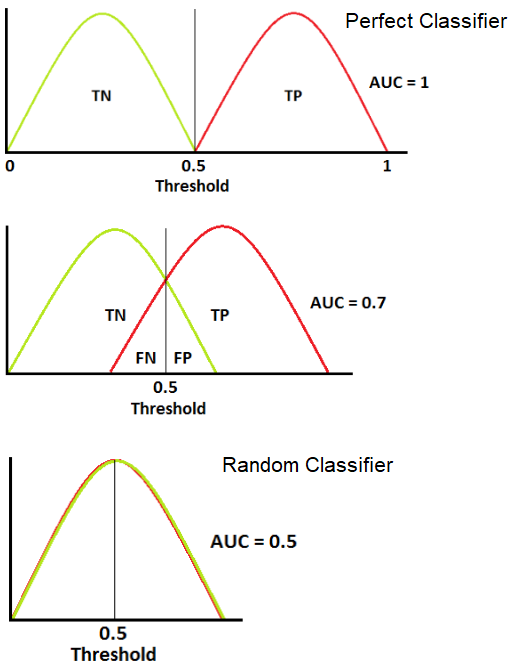

It is a substantially better metric than accuracy for the following reasons:
* It is more robust to class imbalances.
* It gives us information on how the model predicts the positive and negative classes. This could be of substantial clinical value.
* Accuracy is calculated at only one threshold (defaults to 0.5), ROC curves are threshold invariant.

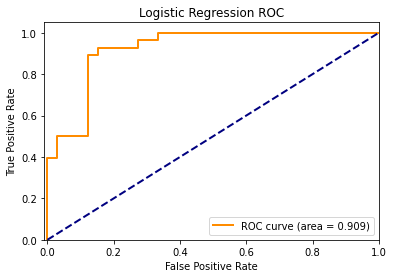

In [131]:
#AUC Plot
roc_auc_curve(prediction_proba, y_test, 'Logistic Regression ROC')

The x axis is defined as the FPR, y axis TPR


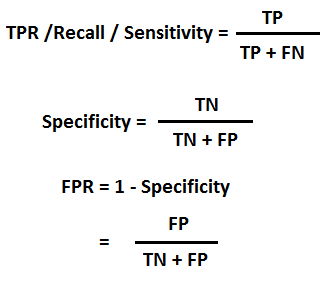

**Support Vector Machine**

In [132]:
model = svm.SVC(kernel='linear', probability=True)
acc_train, acc_test, auc, prediction_proba, predictions = train_model(model, 
                                                                      X_train_scaled, y_train, X_test_scaled, y_test)
print(f'Training Accuracy: {acc_train:.3f}, Testing Accuracy: {acc_test:.3f}')
print(f'Testing AUC Value: {auc:.3f}')

Training Accuracy: 0.846, Testing Accuracy: 0.820
Testing AUC Value: 0.900


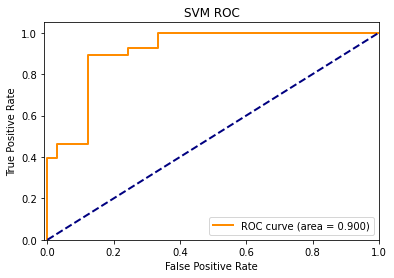

In [133]:
#AUC Curve
roc_auc_curve(prediction_proba, y_test, 'SVM ROC')

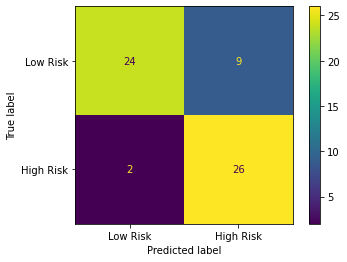

In [134]:
#Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Low Risk', 'High Risk'])
disp.plot()
plt.grid(False)
plt.show()

**Task 3 (10 Minutes)**
 
1. Train a Decision Tree model on our data. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 
2. Plot the ROC curve for this model on the testing data.
3. If you have time, try changing some of the hyperparameters of the model!

Use the helper functions and examples above to guide you through this.

Training Accuracy: 0.725, Testing Accuracy: 0.885
Testing AUC Value: 0.934


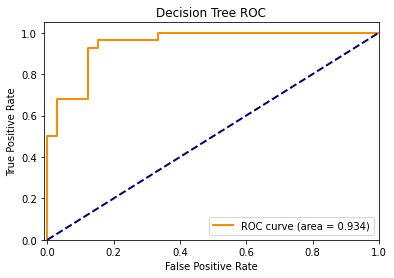

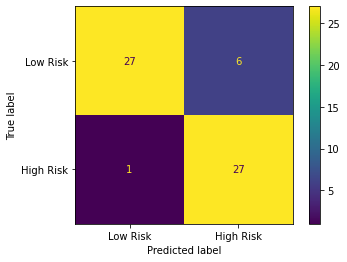

In [143]:
#Decision tree model
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier()
dc_train, acc_test, auc, prediction_proba, predictions = train_model(dc_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(f'Training Accuracy: {acc_train:.3f}, Testing Accuracy: {acc_test:.3f}')
print(f'Testing AUC Value: {auc:.3f}')

# Plot ROC curve
roc_auc_curve(prediction_proba, y_test, 'Decision Tree ROC')

#Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Low Risk', 'High Risk'])
disp.plot()
plt.grid(False)
plt.show()

**Gradient Boosting Classifier**

As you may have seen above, some ML models have multiple different hyperparameters that you can specify. Almost always, the default parameters will not yield the best model. Thus, we can specify a multitude of them and search the hyperparameter space for the best combination. 

In [136]:
#implementing grid search for XGboost model:
from sklearn.ensemble import GradientBoostingClassifier as GBC
#defining hyperparameter grid search parameters
loss = ['deviance', 'exponential'] #hyperparameter search
max_depth = [i for i in range(1, 50, 10)] #hyperparameter search
min_impurity_decrease = [i for i in range(0,50, 10)] #hyperparameter search
min_samples_leaf = [i for i in range(1,50,10)] #hyperparameter search

list_loss = []
list_max_depth = []
list_min_impurity_decrease = []
list_min_samples_leaf = []
list_test_acc = []
list_auc = []
list_preds = []

for i in loss:
  for j in max_depth:
    for k in min_impurity_decrease:
      for z in min_samples_leaf:
        model_xgb = GBC(loss = i, max_depth = j, min_impurity_decrease = k, min_samples_leaf = z, random_state=20) #describe random state
        acc_train, acc_test, auc, predictions_proba, predictions = train_model(model_xgb, X_train_scaled, y_train, X_test_scaled, y_test)
        list_loss.append(i)
        list_max_depth.append(j)
        list_min_impurity_decrease.append(k)
        list_min_samples_leaf.append(z)
        list_test_acc.append(acc_test)
        list_auc.append(auc)
        list_preds.append(predictions)

In [137]:
print(f'Best AUC value achieved during the hyperparameter search = {np.max(list_auc):.3f}')

Best AUC value achieved during the hyperparameter search = 0.934


In [138]:
#Extracting the index of the best model from our list of saved metrics.
index = np.where(list_auc==np.max(list_auc))[0][0]

print(f'Hyperparameter set {index} had the best AUC')

Hyperparameter set 25 had the best AUC


In [139]:
#Extracting best hyperparameters of best model
print(f'Best hyperparameters: \n Loss = {list_loss[index]}\n Max Depth = {list_max_depth[index]}')
print(f' Min Impurity Decrease = {list_min_impurity_decrease[index]}\n Min Samples Leaf = {list_min_samples_leaf[index]}')   

Best hyperparameters: 
 Loss = deviance
 Max Depth = 11
 Min Impurity Decrease = 0
 Min Samples Leaf = 1


In cases where there are many hyperparameters to choose from, it is often useful to search a number of them to see if they generate a better model. In almost all cases, it will be impossible to know which ones in advance will prove to be the best! This example showed one way that you can do this, through a series of for loops.

## Summary
In this workshop, we have learned about:
1. Type and function of common Python data containers.

2. How to import tabular data into python and examine its characteristics.
3. How to apply univariate and multivariate data Imputation techniques to fill missing values.
4. How and why to apply one-hot-encoding for categorical features.
5. Feature selection: creating and interpreting a correlation matrix; applying ANOVA-F feature selection method.
6. Data normalization techniques: MinMax and Standardisation.
7. Training models: Logistic regression, Support-Vector-Machine, Decision Tree, XGBoost.
8. Calculation and importance of AUC, ROC curves, confusion matrices, and pitfalls of accuracy as a performance metric. 
9. How and why to perform grid search over hyperparameter space. 

If you have any questions or would like to get in touch with the workshop hosts, please email:

 jake.kendrick@research.uwa.edu.au and branimir.rusanov@research.uwa.edu.au

## Task Solutions

### Task 1

In [ ]:
imputer_univariate_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_imputed_uni_median = imputer_univariate_median.fit_transform(feats)

#Checking one of the replaced values
print('sanity check instance 11: '+str(df_imputed_uni_median[11,4]))
print('sanity check: imputed instance: '+str(df_imputed_uni_median[12,4]))

### Task 2

In [128]:
#Standardising our training and testing data. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Task 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
acc_train, acc_test, auc, prediction_proba, predictions = train_model(model, 
                                                                      X_train_scaled, y_train, X_test_scaled, y_test)
print(f'Training Accuracy: {acc_train:.3f}, Testing Accuracy: {acc_test:.3f}')
print(f'Testing AUC Value: {auc:.3f}')

In [ ]:
#AUC Curve
roc_auc_curve(prediction_proba, y_test, 'Decision Tree ROC')

In [ ]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Low Risk', 'High Risk'])
disp.plot()
plt.grid(False)
plt.show()